## Installing Dependencies

In [1]:
!pip install gensim
!pip install pyLDAvis
!pip install spacy
!pip install wordcloud
!pip install nltk
!pip install scipy

  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135598 sha256=0093280724192d929f85c4a61174ddc50153dc576150277daeeccebee2c46fab
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\2a\5b\b3\26b52781cdeea9c815e147cfd4ac4a0a3472bce92142115670
Successfully built pyLDAvis


In [2]:
### Import Libraries

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

import gensim    # for topic modelling
import numpy as np
import spacy
import math

from scipy.sparse import csr_matrix
from sklearn.preprocessing import normalize

from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
import pyLDAvis.gensim

import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')  # for sentiment analysis
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text

import os, re, operator, warnings
warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\uSER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\uSER\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\uSER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [8]:
# cleaning dataset from gensim
def clean(text):
    return str(''.join([i if ord(i) < 128 else ' ' for i in text]))

test_data_dir = '{}'.format(os.sep).join([gensim.__path__[0], 'test', 'test_data'])
lee_train_file = test_data_dir + os.sep + 'lee_background.cor'

In [4]:
text = open(lee_train_file).read()
nlp = spacy.load('en_core_web_lg')
stop_words = stopwords.words('english')

In [5]:
text

'Hundreds of people have been forced to vacate their homes in the Southern Highlands of New South Wales as strong winds today pushed a huge bushfire towards the town of Hill Top. A new blaze near Goulburn, south-west of Sydney, has forced the closure of the Hume Highway. At about 4:00pm AEDT, a marked deterioration in the weather as a storm cell moved east across the Blue Mountains forced authorities to make a decision to evacuate people from homes in outlying streets at Hill Top in the New South Wales southern highlands. An estimated 500 residents have left their homes for nearby Mittagong. The New South Wales Rural Fire Service says the weather conditions which caused the fire to burn in a finger formation have now eased and about 60 fire units in and around Hill Top are optimistic of defending all properties. As more than 100 blazes burn on New Year\'s Eve in New South Wales, fire crews have been called to new fire at Gunning, south of Goulburn. While few details are available at th

In [12]:
for stopword in stop_words:
    lexeme = nlp.vocab[stopword]
    lexeme.is_stop = True


In [13]:
doc = nlp(clean(text))

In [14]:
doc

Hundreds of people have been forced to vacate their homes in the Southern Highlands of New South Wales as strong winds today pushed a huge bushfire towards the town of Hill Top. A new blaze near Goulburn, south-west of Sydney, has forced the closure of the Hume Highway. At about 4:00pm AEDT, a marked deterioration in the weather as a storm cell moved east across the Blue Mountains forced authorities to make a decision to evacuate people from homes in outlying streets at Hill Top in the New South Wales southern highlands. An estimated 500 residents have left their homes for nearby Mittagong. The New South Wales Rural Fire Service says the weather conditions which caused the fire to burn in a finger formation have now eased and about 60 fire units in and around Hill Top are optimistic of defending all properties. As more than 100 blazes burn on New Year's Eve in New South Wales, fire crews have been called to new fire at Gunning, south of Goulburn. While few details are available at this

In [15]:
texts, articles = [], []
for w in doc:
    if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num:
        articles.append(w.lemma_)
    if w.text == '\n':
        texts.append(articles)
        articles = []

In [16]:
texts

[['hundred',
  'people',
  'force',
  'vacate',
  'home',
  'Southern',
  'Highlands',
  'New',
  'South',
  'Wales',
  'strong',
  'wind',
  'today',
  'push',
  'huge',
  'bushfire',
  'town',
  'Hill',
  'new',
  'blaze',
  'near',
  'Goulburn',
  'south',
  'west',
  'Sydney',
  'force',
  'closure',
  'Hume',
  'Highway',
  '4:00pm',
  'AEDT',
  'marked',
  'deterioration',
  'weather',
  'storm',
  'cell',
  'move',
  'east',
  'Blue',
  'Mountains',
  'force',
  'authority',
  'decision',
  'evacuate',
  'people',
  'home',
  'outlying',
  'street',
  'Hill',
  'New',
  'South',
  'Wales',
  'southern',
  'highland',
  'estimated',
  'resident',
  'leave',
  'home',
  'nearby',
  'Mittagong',
  'New',
  'South',
  'Wales',
  'Rural',
  'Fire',
  'Service',
  'say',
  'weather',
  'condition',
  'cause',
  'fire',
  'burn',
  'finger',
  'formation',
  'ease',
  'fire',
  'unit',
  'Hill',
  'optimistic',
  'defend',
  'property',
  'blaze',
  'burn',
  'New',
  'Year',
  'Eve',


In [22]:
transformed_texts = [' '.join(i) for i in texts]

In [19]:
transformed_texts

['hundred people force vacate home Southern Highlands New South Wales strong wind today push huge bushfire town Hill new blaze near Goulburn south west Sydney force closure Hume Highway 4:00pm AEDT marked deterioration weather storm cell move east Blue Mountains force authority decision evacuate people home outlying street Hill New South Wales southern highland estimated resident leave home nearby Mittagong New South Wales Rural Fire Service say weather condition cause fire burn finger formation ease fire unit Hill optimistic defend property blaze burn New Year Eve New South Wales fire crew call new fire gunning south Goulburn detail available stage fire authority say close Hume Highway direction new fire Sydney west long threaten property Cranebrook area rain fall part Illawarra Sydney Hunter Valley north coast Bureau Meteorology Claire Richards say rain little ease fire burn state fall isolate area generally fall millimetre say place significant millimetre relief far rain concern fac

In [23]:
# make texts in lower case
transformed_texts_1 = [i.lower() for i in transformed_texts]

In [24]:
transformed_texts_1

['hundred people force vacate home southern highlands new south wales strong wind today push huge bushfire town hill new blaze near goulburn south west sydney force closure hume highway 4:00pm aedt marked deterioration weather storm cell move east blue mountains force authority decision evacuate people home outlying street hill new south wales southern highland estimated resident leave home nearby mittagong new south wales rural fire service say weather condition cause fire burn finger formation ease fire unit hill optimistic defend property blaze burn new year eve new south wales fire crew call new fire gunning south goulburn detail available stage fire authority say close hume highway direction new fire sydney west long threaten property cranebrook area rain fall part illawarra sydney hunter valley north coast bureau meteorology claire richards say rain little ease fire burn state fall isolate area generally fall millimetre say place significant millimetre relief far rain concern fac

In [25]:
### now lets remove numbers embedded from letters

transformed_texts_2 = [re.sub(r'\w*\d\w*', '', i).strip() for i in transformed_texts_1]

In [26]:
transformed_texts_2

['hundred people force vacate home southern highlands new south wales strong wind today push huge bushfire town hill new blaze near goulburn south west sydney force closure hume highway : aedt marked deterioration weather storm cell move east blue mountains force authority decision evacuate people home outlying street hill new south wales southern highland estimated resident leave home nearby mittagong new south wales rural fire service say weather condition cause fire burn finger formation ease fire unit hill optimistic defend property blaze burn new year eve new south wales fire crew call new fire gunning south goulburn detail available stage fire authority say close hume highway direction new fire sydney west long threaten property cranebrook area rain fall part illawarra sydney hunter valley north coast bureau meteorology claire richards say rain little ease fire burn state fall isolate area generally fall millimetre say place significant millimetre relief far rain concern fact pro

Find and count all the unique adjectives in the transformed_texts_2  
Solution 1:

In [28]:
adjectives = []

for token in doc:
    if token.pos_ == "ADJ" and token.text not in adjectives:
        adjectives.append(token.text)

print(len(adjectives))

955


Alternate Solution:

In [29]:
adj = []
for text_ in transformed_texts_2:
    doc = nlp(text_)
    adj.append([token.text for token in doc if token.pos_ == "ADJ"])

In [30]:
adj # result is a nested list

[['southern',
  'new',
  'south',
  'strong',
  'huge',
  'new',
  'marked',
  'blue',
  'outlying',
  'new',
  'south',
  'southern',
  'new',
  'south',
  'rural',
  'optimistic',
  'new',
  'new',
  'south',
  'new',
  'south',
  'available',
  'close',
  'new',
  'little',
  'significant',
  'far',
  'associate'],
 ['indian',
  'suspect',
  'militant',
  'southern',
  'south',
  'pakistani',
  'militant',
  'extremist',
  'taiba',
  'jaish',
  'behest',
  'pakistani',
  'military',
  'military',
  'tat',
  'diplomatic',
  'taiba',
  'militant',
  'military'],
 ['national', 'new', 'few', 'new', 'south', 'western', 'northern', 'free'],
 ['political',
  'economic',
  'interim',
  'key',
  'massive',
  'foreign',
  'new',
  'new',
  'new',
  'senior',
  'fresh',
  'bad',
  'international'],
 ['inappropriate',
  'unprofessional',
  'chief',
  'executive',
  'angry',
  'inappropriate',
  'senior'],
 ['federal',
  'safe',
  'afghani',
  'interim',
  'foreign',
  'long',
  'major',
  'long

In [31]:
from itertools import chain  ## making it into one array

adj_ = list(chain(*adj))

In [34]:
adj__ = list(set(adj_))
len(adj__)

986

### Exercise No. 2: Find the total number of unique ENTITIES

In [32]:
parsed = nlp(transformed_texts_2[0])
parsed.ents

(today, sydney, claire richards)

In [78]:
doc2 = nlp(' '.join([x for x in transformed_texts_2]))

doc2_ents = doc2.ents
entity = 0
ent_list = list()

for token in doc2_ents:
    if token.text not in ent_list:
        ent_list.append(token.text)
        entity +=1

In [80]:
print(f'Number of unique entities: {entity}')

Number of unique entities: 495


## TF-IDF
  
Defining the functions

In [36]:
def IDF(corpus, unique_words):
    idf_dict = {}
    N = len(corpus)
    for i in unique_words:
        count = 0
        for sentence in corpus:
            if i in sentence.split():
                count = count+1
            idf_dict[i] = (math.log((N+1)/(count+1)))+1  # +1 to ensure no error if denominator is zero
    return idf_dict


def fit(whole_data):
    unique_words = set()
    if isinstance(whole_data, (list,)):
        for x in whole_data:
            for y in x.split():
                if len(y)<2:
                    continue
                unique_words.add(y)
        unique_words = sorted(list(unique_words))
        vocab = {j:i for i,j in enumerate(unique_words)}
        Idf_values_of_all_unique_words = IDF(whole_data, unique_words)
    return vocab, Idf_values_of_all_unique_words

import numpy as np

def transform(dataset, vocabulary, idf_values):
    vocab={}
    sparse_matrix = csr_matrix((len(dataset), len(vocabulary)), dtype = np.float64)
    for row in range(0, len(dataset)):
        number_of_words_in_sentence = Counter(dataset[row].split())
        for word in dataset[row].split():
            if word in list(vocabulary.keys()):
                tf_idf_value=(number_of_words_in_sentence[word]/len(dataset[row].split()))*(idf_values[word])
                sparse_matrix[row, vocabulary[word]]=tf_idf_value
                vocab[word] = tf_idf_value
    return vocab

In [37]:
Vocabulary, idf_of_vocabulary = fit(transformed_texts_2)

In [38]:
Vocabulary ## index

{'aamer': 0,
 'aarage': 1,
 'abandon': 2,
 'abate': 3,
 'abbott': 4,
 'abc': 5,
 'abdel': 6,
 'abdomen': 7,
 'abdominal': 8,
 'abduct': 9,
 'abduction': 10,
 'abdul': 11,
 'abdullah': 12,
 'abegglen': 13,
 'abide': 14,
 'ability': 15,
 'able': 16,
 'abloy': 17,
 'ablution': 18,
 'ably': 19,
 'aboard': 20,
 'aboriginal': 21,
 'abortion': 22,
 'abroad': 23,
 'abruptly': 24,
 'abscond': 25,
 'absolutely': 26,
 'abstain': 27,
 'abu': 28,
 'abuse': 29,
 'abusive': 30,
 'aca': 31,
 'academic': 32,
 'accc': 33,
 'accelerate': 34,
 'accept': 35,
 'acceptable': 36,
 'access': 37,
 'accident': 38,
 'accolade': 39,
 'accommodation': 40,
 'accompany': 41,
 'accomplishment': 42,
 'accord': 43,
 'account': 44,
 'accountable': 45,
 'accountancy': 46,
 'accounting': 47,
 'accrue': 48,
 'accumulate': 49,
 'accuracy': 50,
 'accurate': 51,
 'accusation': 52,
 'accuse': 53,
 'acdt': 54,
 'achieve': 55,
 'achievement': 56,
 'acknowledge': 57,
 'acquisition': 58,
 'acquit': 59,
 'act': 60,
 'action': 61,
 '

In [39]:
idf_of_vocabulary ## score

{'aamer': 6.0106352940962555,
 'aarage': 6.0106352940962555,
 'abandon': 5.0943445622221,
 'abate': 5.605170185988092,
 'abbott': 6.0106352940962555,
 'abc': 5.605170185988092,
 'abdel': 5.605170185988092,
 'abdomen': 6.0106352940962555,
 'abdominal': 6.0106352940962555,
 'abduct': 6.0106352940962555,
 'abduction': 6.0106352940962555,
 'abdul': 5.0943445622221,
 'abdullah': 5.605170185988092,
 'abegglen': 5.31748811353631,
 'abide': 6.0106352940962555,
 'ability': 4.912023005428146,
 'able': 3.870569130599985,
 'abloy': 5.31748811353631,
 'ablution': 6.0106352940962555,
 'ably': 6.0106352940962555,
 'aboard': 4.7578723256008875,
 'aboriginal': 5.31748811353631,
 'abortion': 6.0106352940962555,
 'abroad': 5.605170185988092,
 'abruptly': 6.0106352940962555,
 'abscond': 5.605170185988092,
 'absolutely': 4.506557897319982,
 'abstain': 6.0106352940962555,
 'abu': 4.912023005428146,
 'abuse': 4.506557897319982,
 'abusive': 5.605170185988092,
 'aca': 6.0106352940962555,
 'academic': 6.0106352

In [42]:
sorted_idf = dict(sorted(idf_of_vocabulary.items(), key=operator.itemgetter(1), reverse=True))

In [43]:
sorted_idf

{'aamer': 6.0106352940962555,
 'aarage': 6.0106352940962555,
 'abbott': 6.0106352940962555,
 'abdomen': 6.0106352940962555,
 'abdominal': 6.0106352940962555,
 'abduct': 6.0106352940962555,
 'abduction': 6.0106352940962555,
 'abide': 6.0106352940962555,
 'ablution': 6.0106352940962555,
 'ably': 6.0106352940962555,
 'abortion': 6.0106352940962555,
 'abruptly': 6.0106352940962555,
 'abstain': 6.0106352940962555,
 'aca': 6.0106352940962555,
 'academic': 6.0106352940962555,
 'accc': 6.0106352940962555,
 'accelerate': 6.0106352940962555,
 'acceptable': 6.0106352940962555,
 'accolade': 6.0106352940962555,
 'accommodation': 6.0106352940962555,
 'accountable': 6.0106352940962555,
 'accounting': 6.0106352940962555,
 'accrue': 6.0106352940962555,
 'accuracy': 6.0106352940962555,
 'accusation': 6.0106352940962555,
 'achievement': 6.0106352940962555,
 'acquisition': 6.0106352940962555,
 'activist': 6.0106352940962555,
 'actress': 6.0106352940962555,
 'adams': 6.0106352940962555,
 'adhere': 6.010635

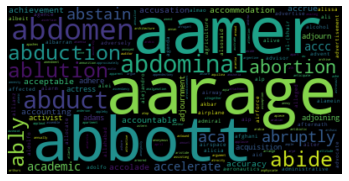

In [45]:
wordcloud = WordCloud().generate_from_frequencies(idf_of_vocabulary)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [48]:
## let's say you want to remove aamer
stop_words.extend(['aamer'])
stopwords_dict = Counter(stop_words)
transformed_texts_3 = [' '.join([word for word in i.split() if word not in stopwords_dict]) for i in transformed_texts_2]

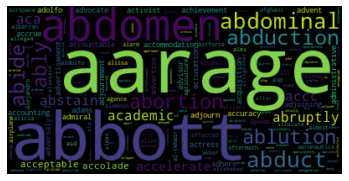

In [49]:
Vocabulary, idf_of_vocabulary = fit(transformed_texts_3)
wordcloud = WordCloud().generate_from_frequencies(idf_of_vocabulary)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [50]:
final_output = transform(transformed_texts_3, Vocabulary, idf_of_vocabulary)

In [51]:
final_output # usable tf-idf

{'hundred': 0.01833370536903864,
 'people': 0.03608595756191217,
 'force': 0.08338665510199662,
 'vacate': 0.03780273769871859,
 'home': 0.03748861398505311,
 'southern': 0.06345195296065549,
 'highlands': 0.03780273769871859,
 'new': 0.037475219440501965,
 'south': 0.04025061037060397,
 'wales': 0.05414073922941059,
 'strong': 0.19352845652999928,
 'wind': 0.02638385068735852,
 'today': 0.044512627639838674,
 'push': 0.01849736373190546,
 'huge': 0.011606164964576362,
 'bushfire': 0.03127934184433124,
 'town': 0.01585158771135653,
 'hill': 0.3515729854056834,
 'blaze': 0.07434175508751387,
 'near': 0.05257827726540527,
 'goulburn': 0.07560547539743719,
 'west': 0.01293256013382952,
 'sydney': 0.03484313994238426,
 'closure': 0.03224268710267152,
 'hume': 0.15789211791515753,
 'highway': 0.0779686191337801,
 'aedt': 0.024486296054463508,
 'marked': 0.03780273769871859,
 'deterioration': 0.03780273769871859,
 'weather': 0.06340635084542612,
 'storm': 0.16226445480262314,
 'cell': 0.2311

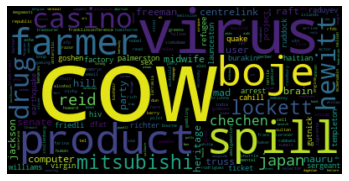

In [52]:
wordcloud = WordCloud().generate_from_frequencies(final_output)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

### Shortcut of TF-IDF

In [56]:
# define the model
tfidf = TfidfVectorizer(sublinear_tf=True, norm='l2', min_df=5, encoding='latin-1', ngram_range = (1,1),
                       stop_words=stop_words)

# apply fit_transform()
features = tfidf.fit_transform(transformed_texts_3)

d = tfidf.vocabulary_

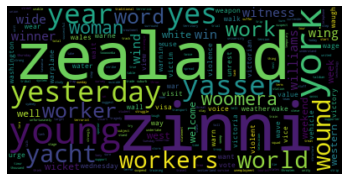

In [57]:
wordcloud = WordCloud().generate_from_frequencies(d)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

### VADER (Valence Aware Dictionary and sEntiment Reasoner)
Used for Sentiment Analysis

In [58]:
sid = SentimentIntensityAnalyzer()
for i in range(len(transformed_texts_3)):
    print(transformed_texts_3[i] + ':')
    scores = sid.polarity_scores(transformed_texts_3[i])
    print(scores)

hundred people force vacate home southern highlands new south wales strong wind today push huge bushfire town hill new blaze near goulburn south west sydney force closure hume highway : aedt marked deterioration weather storm cell move east blue mountains force authority decision evacuate people home outlying street hill new south wales southern highland estimated resident leave home nearby mittagong new south wales rural fire service say weather condition cause fire burn finger formation ease fire unit hill optimistic defend property blaze burn new year eve new south wales fire crew call new fire gunning south goulburn detail available stage fire authority say close hume highway direction new fire sydney west long threaten property cranebrook area rain fall part illawarra sydney hunter valley north coast bureau meteorology claire richards say rain little ease fire burn state fall isolate area generally fall millimetre say place significant millimetre relief far rain concern fact proba

{'neg': 0.295, 'neu': 0.593, 'pos': 0.112, 'compound': -0.975}
death toll argentina food riot rise local medium report people die morning clash police protester near presidential palace capital buenos aires president fernando de la rua call opposition government national unity apparently resign loot rioting generally give way peaceful demonstration falter government blame month recession heavily armed police power day state siege decree attempt prevent large public gathering union leader worker unemployed stop government remove living standard restore argentina discredit economy minister go government hope approve new budget acceptable international monetary fund imf avoid default $ foreign debt president neighbour brazil chile fear social unrest infect nation argentina leader resolve crisis quickly:
{'neg': 0.252, 'neu': 0.629, 'pos': 0.119, 'compound': -0.9612}
woomera detention centre outback south australia experience quiet night week sunday government decision freeze processing vi

{'neg': 0.15, 'neu': 0.709, 'pos': 0.141, 'compound': -0.9118}
helicopter land near tora bora mountain eastern afghanistan start raid al qaeda fighter afp journalist say helicopter land : local time : aedt hour al qaeda fighter reject deadline set afghan militia leader surrender face death warplane bomb network cave tunnel day hunt al qaeda leader osama bin laden witness speak recent day see member british special force near frontline local afghan militia follower bin laden see clearly hear come land strong light see district b- bomber warplane stage series attack al qaeda position white mountains bin laden fighter fail surrender crew member b- bomber crash indian ocean near diego garcia rescue military official say pentagon spokesman navy captain timothy taylor say initial report say aboard destroyer uss russell rush scene crash b- bomber usually carry crew arm bomb cruise missile engage air war afghanistan pentagon official say hear crash : aedt unable plane head diego garcia fly ind

{'neg': 0.138, 'neu': 0.841, 'pos': 0.021, 'compound': -0.9042}
australian swimmer event contest skin swimming event sydney night metre race swum elimination format race determine overall winner geoff huegill metre butterfly second look forward world cup event melbourne tomorrow race get well well term jump make sure nail metre water explode water work turn try nail finish say elka graham womens metre freestyle contest race metre say champiom kieren perkins victory swim kieren morning give awesome advice tell close eye metre absolutely say american ed moses man metre breaststroke liesel jones take woman event world champion matt welsh swimmer eliminate metre backstroke eventually australia ray hass winner event receive dollar welsh early night eliminate metre event ray hass rebecca creedy cause upset defeat sarah ryan metre freestyle julia ham woman metre butterfly say $ prizemoney pay $ heater pool queensland train child thermostat break old go go yesterday degree water terrible like 

### Topic Modelling

In [59]:
texts ## see New South, Blue Montains, they are treated as different wordsS

[['hundred',
  'people',
  'force',
  'vacate',
  'home',
  'Southern',
  'Highlands',
  'New',
  'South',
  'Wales',
  'strong',
  'wind',
  'today',
  'push',
  'huge',
  'bushfire',
  'town',
  'Hill',
  'new',
  'blaze',
  'near',
  'Goulburn',
  'south',
  'west',
  'Sydney',
  'force',
  'closure',
  'Hume',
  'Highway',
  '4:00pm',
  'AEDT',
  'marked',
  'deterioration',
  'weather',
  'storm',
  'cell',
  'move',
  'east',
  'Blue',
  'Mountains',
  'force',
  'authority',
  'decision',
  'evacuate',
  'people',
  'home',
  'outlying',
  'street',
  'Hill',
  'New',
  'South',
  'Wales',
  'southern',
  'highland',
  'estimated',
  'resident',
  'leave',
  'home',
  'nearby',
  'Mittagong',
  'New',
  'South',
  'Wales',
  'Rural',
  'Fire',
  'Service',
  'say',
  'weather',
  'condition',
  'cause',
  'fire',
  'burn',
  'finger',
  'formation',
  'ease',
  'fire',
  'unit',
  'Hill',
  'optimistic',
  'defend',
  'property',
  'blaze',
  'burn',
  'New',
  'Year',
  'Eve',


In [60]:
bigram = gensim.models.Phrases(texts)
texts = [bigram[line] for line in texts]

In [61]:
texts  ## now words that should be together are treated as one words

[['hundred',
  'people',
  'force',
  'vacate',
  'home',
  'Southern',
  'Highlands',
  'New_South',
  'Wales',
  'strong',
  'wind',
  'today',
  'push',
  'huge',
  'bushfire',
  'town',
  'Hill',
  'new',
  'blaze',
  'near',
  'Goulburn',
  'south_west',
  'Sydney',
  'force',
  'closure',
  'Hume',
  'Highway',
  '4:00pm',
  'AEDT',
  'marked',
  'deterioration',
  'weather',
  'storm',
  'cell',
  'move',
  'east',
  'Blue_Mountains',
  'force',
  'authority',
  'decision',
  'evacuate',
  'people',
  'home',
  'outlying',
  'street',
  'Hill',
  'New_South',
  'Wales',
  'southern',
  'highland',
  'estimated',
  'resident',
  'leave',
  'home',
  'nearby',
  'Mittagong',
  'New_South',
  'Wales',
  'Rural_Fire',
  'Service',
  'say',
  'weather_condition',
  'cause',
  'fire_burn',
  'finger',
  'formation',
  'ease',
  'fire',
  'unit',
  'Hill',
  'optimistic',
  'defend',
  'property',
  'blaze',
  'burn',
  'New',
  'Year',
  'Eve',
  'New_South',
  'Wales',
  'fire',
  'c

In [63]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [64]:
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 2),
  (8, 1),
  (9, 2),
  (10, 3),
  (11, 2),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 4),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 3),
  (23, 1),
  (24, 4),
  (25, 1),
  (26, 2),
  (27, 1),
  (28, 2),
  (29, 1),
  (30, 2),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 2),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 3),
  (53, 1),
  (54, 1),
  (55, 5),
  (56, 2),
  (57, 1),
  (58, 3),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 3),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 2),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 3),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 2),
  (83, 1),
  (84, 1),
  (85, 2),
  (86, 1),
  (87, 3),
  (88, 1),
  (89, 1),
  (90, 4),
  (91, 1)

#### LSI Model

In [65]:
lsimodel = LsiModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [66]:
lsimodel.show_topics(num_topics = 5)

[(0,
  '-0.788*"say" + -0.142*"Mr" + -0.095*"force" + -0.094*"israeli" + -0.094*"people" + -0.083*"Australia" + -0.082*"kill" + -0.080*"attack" + -0.079*"palestinian" + -0.079*"official"'),
 (1,
  '0.387*"israeli" + 0.345*"palestinian" + 0.286*"Mr_Arafat" + 0.192*"Israel" + 0.177*"official" + -0.164*"say" + 0.164*"Hamas" + 0.155*"kill" + 0.151*"West_Bank" + 0.136*"attack"'),
 (2,
  '-0.314*"Afghanistan" + -0.295*"force" + -0.217*"Al_Qaeda" + -0.194*"bin_Laden" + -0.159*"fighter" + -0.153*"Taliban" + -0.153*"Tora_Bora" + -0.150*"Pakistan" + -0.141*"afghan" + 0.115*"fire"'),
 (3,
  '-0.403*"fire" + -0.290*"area" + -0.245*"Sydney" + -0.193*"firefighter" + -0.177*"north" + -0.167*"Wales" + -0.167*"New_South" + -0.167*"wind" + -0.141*"south" + -0.128*"line"'),
 (4,
  '-0.240*"Australia" + -0.234*"test" + 0.226*"Mr" + -0.222*"day" + -0.195*"match" + -0.187*"wicket" + -0.186*"South_Africa" + -0.167*"good" + -0.155*"play" + -0.147*"run"')]

#### LDA Model

In [67]:
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)
ldamodel.show_topics()

[(0,
  '0.030*"say" + 0.004*"Mr" + 0.004*"people" + 0.004*"know" + 0.004*"good" + 0.004*"time" + 0.004*"think" + 0.004*"metre" + 0.003*"Australia" + 0.003*"come"'),
 (1,
  '0.033*"say" + 0.007*"Mr" + 0.004*"year" + 0.004*"claim" + 0.004*"Australia" + 0.003*"day" + 0.003*"man" + 0.003*"President" + 0.003*"Government" + 0.003*"work"'),
 (2,
  '0.022*"say" + 0.007*"people" + 0.005*"man" + 0.004*"Mr" + 0.004*"attack" + 0.004*"israeli" + 0.003*"year" + 0.003*"day" + 0.003*"month" + 0.003*"report"'),
 (3,
  '0.016*"say" + 0.005*"israeli" + 0.004*"tell" + 0.004*"Mr" + 0.003*"day" + 0.003*"palestinian" + 0.003*"pay" + 0.003*"australian" + 0.003*"people" + 0.003*"area"'),
 (4,
  '0.022*"say" + 0.006*"people" + 0.006*"report" + 0.006*"Mr" + 0.006*"year" + 0.005*"Australia" + 0.003*"company" + 0.003*"give" + 0.003*"new" + 0.003*"rate"'),
 (5,
  '0.014*"say" + 0.005*"Australia" + 0.004*"group" + 0.004*"day" + 0.004*"Pakistan" + 0.003*"israeli" + 0.003*"militant" + 0.003*"force" + 0.003*"report" + 

#### HDP Model

In [68]:
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)
hdpmodel.show_topics()

[(0,
  '0.006*say + 0.003*group + 0.003*Harrison + 0.003*palestinian + 0.003*Government + 0.002*  + 0.002*choose + 0.002*kill + 0.002*call + 0.002*George + 0.002*israeli + 0.002*tonight + 0.002*state + 0.002*Hamas + 0.002*Liverpool + 0.002*union + 0.002*people + 0.002*attack + 0.002*militant + 0.001*agreement'),
 (1,
  '0.007*say + 0.003*Afghanistan + 0.003*Krishna + 0.002*ashe + 0.002*Benares + 0.002*Hare + 0.002*Taliban + 0.002*President + 0.002*Harrison + 0.002*ceremony + 0.002*Ganges + 0.002*Rabbani + 0.002*Mr_Powell + 0.002*southern + 0.002*object + 0.002*devotee + 0.002*official + 0.002*holy + 0.001*Laden + 0.001*Hindus'),
 (2,
  '0.006*storm + 0.005*say + 0.004*damage + 0.003*hit + 0.003*tree + 0.003*Sydney + 0.002*north + 0.002*area + 0.002*SES + 0.002*bad + 0.002*Mr + 0.002*home + 0.002*work + 0.002*volunteer + 0.002*New_South + 0.002*disaster + 0.002*force + 0.002*treat + 0.002*Wales + 0.001*Emergency'),
 (3,
  '0.009*say + 0.003*Taliban + 0.003*airport + 0.003*strong + 0.002

Visualization

In [69]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary) #not applicable to LSI model

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.008386 -0.045747       1        1  22.206774
8     -0.016612  0.008241       2        1  16.024634
9     -0.001460 -0.033673       3        1  11.165009
1     -0.018225 -0.000705       4        1  10.399052
2      0.037315  0.010053       5        1   9.571772
0      0.040833 -0.028615       6        1   7.377074
4      0.033652  0.044339       7        1   6.660668
5     -0.052873  0.011978       8        1   5.838611
7     -0.002855  0.001698       9        1   5.416692
3     -0.011389  0.032431      10        1   5.339715, topic_info=           Term        Freq       Total Category  logprob  loglift
90          say  808.000000  808.000000  Default  30.0000  30.0000
200        year   87.000000   87.000000  Default  29.0000  29.0000
82       people  109.000000  109.000000  Default  28.0000  28.0000
881      report   66.000000   66.000000  Default  27.0000  27.0000
309   Australia  112.000000  112.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
58        force    3.772593   95.684210  Topic10  -6.0442  -0.3033
102       today    3.475892   64.918490  Topic10  -6.1261   0.0027
200        year    3.546348   87.931382  Topic10  -6.1061  -0.2806
2193  Mr_Arafat    3.251843   43.292835  Topic10  -6.1928   0.3412
129      attack    3.278726   75.725867  Topic10  -6.1845  -0.2097

[828 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
636       1  0.193528            
636       2  0.193528            
636       3  0.107515            
636       4  0.086012            
636       5  0.064509            
...     ...       ...         ...
178       7  0.046957   yesterday
178       8  0.093914   yesterday
178       9  0.046957   yesterday
178      10  0.093914   yesterday
5460      8  0.695278  zimbabwean

[2348 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 9, 10, 2, 3, 1, 5, 6, 8, 4])

In [70]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(hdpmodel, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster          Freq
topic                                                   
0      0.090308  0.051851       1        1  7.461759e+00
3      0.074147 -0.014257       2        1  6.433606e+00
1      0.065612 -0.045870       3        1  5.603553e+00
4      0.064286  0.027077       4        1  4.458576e+00
6      0.037382  0.013086       5        1  4.016751e+00
...         ...       ...     ...      ...           ...
140   -0.009169  0.020011     146        1  1.787520e-07
144   -0.013105 -0.010983     147        1  3.501860e-08
145   -0.007193 -0.009887     148        1  2.230165e-08
146   -0.009733  0.010807     149        1  1.365747e-08
148   -0.016609  0.008010     150        1  4.908103e-09

[150 rows x 5 columns], topic_info=            Term          Freq      Total  Category  logprob  loglift
835      israeli  2.000000e+01  20.000000   Default  30.0000  30.0000
5420    Harrison  1.300000e+01  13.000000   Default  29.0000  29.0000
316   Government  1.500000e+01  15.000000   Default  28.0000  28.0000
323      Taliban  1.500000e+01  15.000000   Default  27.0000  27.0000
58         force  1.500000e+01  15.000000   Default  26.0000  26.0000
...          ...           ...        ...       ...      ...      ...
3055        Bill  1.236034e-09   4.607873  Topic150  -7.0758   1.6984
2780      intake  1.214691e-09   4.502825  Topic150  -7.0932   1.7041
2853    retailer  1.248043e-09   5.537695  Topic150  -7.0661   1.5243
547        large  1.296964e-09   7.490839  Topic150  -7.0277   1.2606
832      include  1.223761e-09  11.077943  Topic150  -7.0858   0.8113

[6267 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
636       1  0.374211      
636       3  0.074842      
636       8  0.074842      
362       3  0.131895     $
362       6  0.131895     $
...     ...       ...   ...
4593      5  0.178435  zero
4593      6  0.178435  zero
2789      2  0.184876  zone
2789      5  0.184876  zone
2789      6  0.184876  zone

[3405 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 5, 7, 3, 6, 17, 13, 10, 23, 26, 27, 12, 60, 16, 36, 15, 21, 11, 33, 19, 68, 8, 32, 9, 57, 30, 38, 45, 43, 22, 31, 39, 129, 35, 50, 25, 95, 46, 42, 44, 14, 48, 18, 83, 20, 64, 53, 84, 29, 54, 52, 117, 41, 24, 28, 65, 130, 74, 49, 124, 115, 108, 51, 56, 94, 82, 80, 70, 75, 114, 92, 144, 66, 86, 138, 47, 125, 131, 107, 122, 119, 93, 63, 85, 40, 128, 71, 120, 143, 99, 98, 111, 79, 59, 69, 91, 110, 96, 112, 73, 127, 134, 102, 140, 37, 148, 34, 109, 62, 150, 121, 113, 58, 142, 55, 61, 67, 72, 76, 77, 78, 81, 87, 88, 89, 90, 97, 101, 100, 103, 104, 105, 106, 116, 118, 123, 126, 132, 133, 135, 136, 137, 139, 141, 145, 146, 147, 149])

In [71]:
## Getting the topwords per topic
lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted = False)]
hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted = False)]
ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted = False)]

In [72]:
lsitopics

[['say',
  'Mr',
  'force',
  'israeli',
  'people',
  'Australia',
  'kill',
  'attack',
  'palestinian',
  'official'],
 ['israeli',
  'palestinian',
  'Mr_Arafat',
  'Israel',
  'official',
  'say',
  'Hamas',
  'kill',
  'West_Bank',
  'attack'],
 ['Afghanistan',
  'force',
  'Al_Qaeda',
  'bin_Laden',
  'fighter',
  'Taliban',
  'Tora_Bora',
  'Pakistan',
  'afghan',
  'fire'],
 ['fire',
  'area',
  'Sydney',
  'firefighter',
  'north',
  'Wales',
  'New_South',
  'wind',
  'south',
  'line'],
 ['Australia',
  'test',
  'Mr',
  'day',
  'match',
  'wicket',
  'South_Africa',
  'good',
  'play',
  'run'],
 ['Mr',
  'say',
  'force',
  'company',
  'Qantas',
  'union',
  'day',
  'Afghanistan',
  'Pakistan',
  'Australia'],
 ['Pakistan',
  'India',
  'President',
  'indian',
  'tension',
  'tell',
  'Musharraf',
  'kill',
  'man',
  'want'],
 ['metre',
  'event',
  'race',
  'water',
  'woman',
  'Mr',
  ' ',
  'winner',
  'Ray',
  'contest'],
 ['Mr',
  'Pakistan',
  'India',
  'Qan

In [73]:
### Getting the coherence score
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts = texts,dictionary=dictionary, window_size = 10).get_coherence()
hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts = texts,dictionary=dictionary, window_size = 10).get_coherence()
lda_coherence = CoherenceModel(topics=ldatopics[:10], texts = texts,dictionary=dictionary, window_size = 10).get_coherence()

In [76]:
# plotting the coherence score:
def evaluate_bar_graph(coherences, indices):
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')
    plt.title('Topic Model Performance')

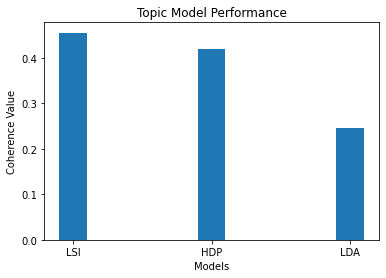

In [77]:
evaluate_bar_graph([lsi_coherence, hdp_coherence, lda_coherence], ['LSI', 'HDP', 'LDA'])